In [1]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist, pdist, squareform
from itertools import product
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from random import randint
from scipy.stats import norm
import random
import scipy


In [2]:
#The squared exponential covariance function
def SqExp(sigma, X1, X2, lenScale):
    
    pairwise_sq_dists = cdist(X1, X2, 'sqeuclidean')
    K = scipy.exp(-pairwise_sq_dists / (lenScale**2))   
    
    return (sigma**2) * K

In [3]:
#Function for plotting the GP
def plot_gp(mu, cov, X, lenScale, samples=[]):
    X = X.ravel()
   
    pb.figure()
    for i, sample in enumerate(samples):
        plt.plot(X, sample)
    title = 'length-scale '+str(lenScale)
    pb.title(title)
    #plt.savefig('lenscale' + str(lenScale) + '.png')
    pb.show()
    

In [4]:
#Change lenScale for question 10
prior_sigma = 3.5
prior_lenScale = 14

In [5]:
#Generate prior samples and calling plot function
def gen_prior_plot(sigma, lenScale):
    X = np.linspace(-4.0,6.0,1000).reshape(-1,1)

    # Mean and covariance of the prior
    mu = np.zeros(X.shape)
    cov = SqExp(sigma, X, X, lenScale)

    #cov1 = kernel(X, X, lenScale, sigma)

    samples_prior = np.random.multivariate_normal(mu.ravel(), cov, 10)

    # Plot GP with the samples 
    plot_gp(mu, cov, X, lenScale, samples=samples_prior)


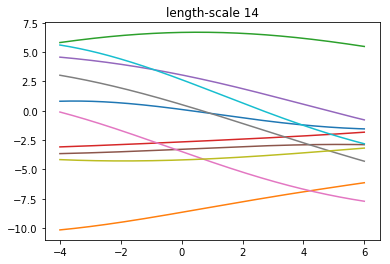

In [6]:
GP_prior = gen_prior_plot(prior_sigma, prior_lenScale)

In [7]:
#Generating data according to instructions
def gen_data(X, Noise = False):
    
    if Noise == True:

        sigma = np.sqrt(3.5)
        epsilon = sigma * np.random.randn() + 0

        Y = (2+(0.5*X-1)**2)*np.sin(3*X) + epsilon
        
    else:
        
        Y = (2+(0.5*X-1)**2)*np.sin(3*X)
        
    return X, Y

In [8]:
#Computing the posterior according to slides
def GP_posterior(X, Y, xstar, sigma, lenScale, irreducible_error = None):
    #Calculating the posterior [A C, C.T B]
    
    A = SqExp(sigma, X, X, lenScale)
    
    C = SqExp(sigma, X, xstar, lenScale)
    
    C_t = np.transpose(C)
    
    #C_t = SqExp(sigma, xstar, X, lenScale)
    
    B = SqExp(sigma, xstar, xstar, lenScale)
    
    mean = np.dot(np.dot(C_t, np.linalg.inv(A)),Y)
    
    variance = B - np.dot(C_t, np.dot(np.linalg.inv(A), C))
    
    return mean, variance

In [23]:
#Plotting posterior
def posterior_samp(X, Y, xstar, X_true, Y_true, mean, covariance):
    #X, Y = gen_data(Noise = True)
    
    #x = np.linspace(-4.0,6.0,1000).reshape(-1,1)
    
    #mean, covariance= GP_posterior(X, Y, x, 1, 1)
  
    Z = np.random.multivariate_normal(mean.ravel() ,covariance ,10)
    
    pb.figure()
    #pb.plot(x, mean, color='black', linestyle='--', label='mean')
    #pb.plot(X,Y,'ro')
    for i in range(10):
        pb.plot(xstar[:],Z[i,:])
        
    pb.plot(xstar, mean, color='black', linestyle='--', label='mean')
    pb.plot(X,Y,'ro')
    pb.plot(X_true,Y_true, 'bo')
    
    var = np.diag(covariance)

    s = np.sqrt(var);
    

    plt.xlim(min(xstar),max(xstar))   
    plt.savefig('posteriorraw' + '.png')
    
    pb.show()

In [24]:
#Plotting posterior with mean and variance
def posterior_samp2(Y, x, X_true, Y_true, X_train, mean, covariance):
    
    
    Z = np.random.multivariate_normal(mean.ravel() ,covariance ,10)
    
    plt.plot(x, mean, color = "black", zorder=2, linestyle='--', label="mean")
    # Get predictive variance as vector
    var = np.diag(covariance)

    s = np.sqrt(var);
    # Plot variance

    mean = mean.ravel()
    
    plt.gca().fill_between(x.flat, mean-s, mean+s, color="lightblue", label= "variance")
    plt.scatter(X_train, Y, color="red", zorder=3)#, label="noisy data")
    plt.scatter(X_train, Y_true, color='blue', zorder=3)#, label="noise free data");
    #plt.plot(Xtest.flatten(), generate_true_output(Xtest.flatten()), color='blue', linestyle='--');

    plt.xlim(min(x),max(x))
    #plt.ylim(f_min, f_max)


    plt.title('Posterior');
    plt.legend()
    plt.savefig('posteriormucov' + '.png')
    plt.show();

In [17]:
#Generating training input
num_observed_data = 9
num_unobserved_data = 1000
irreducible_error = 3.5
lenScale = 1.5
X_train = np.linspace(-4.0,6.0, num_observed_data).reshape(-1,1)

In [18]:
#Generating noisy output
X_noise, Y_noise = gen_data(X_train, Noise = True)
X, Y = gen_data(X_train)

In [19]:
#Generating unobserved data
X_star = np.linspace(-10.0,14.0, num_unobserved_data).reshape(-1,1)

In [20]:
#Calculating the mean and covariance based on data
mean, covariance = GP_posterior(X_train, Y_noise, X_star, prior_sigma, lenScale, irreducible_error)

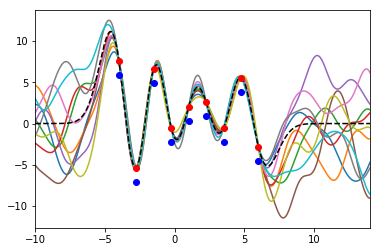

In [25]:
plot_post = posterior_samp(X_noise, Y_noise, X_star, X, Y, mean, covariance)

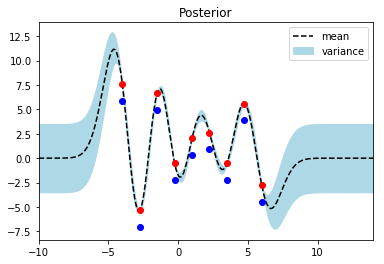

In [26]:
plot_post_mean_cov = posterior_samp2(Y_noise, X_star, X, Y, X_train, mean, covariance)